# Task 2 Data Preprocessing

In [27]:
import os
import json
import time
import requests
import datetime
import dateutil
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt


In [28]:
dataframe=pd.read_csv("/Users/aditya/Desktop/Sem 1/Data Science/22201360/headlines/combined_csv.csv")
dataframe.head()

,headline,date,id,doc_type,material_type,sectionname,keywords,printpage,wordcount,newsdesk
0,How to Dispute Surprise Medical Bills,2022-07-01,nyt://article/0dc0f814-bbfb-5b47-9f2c-3d1042df...,article,News,Well,"['Content Type: Service', 'Emergency Medical T...",7.0,1620,Well
1,One Dead and 22 Have Been Hospitalized in List...,2022-07-01,nyt://article/9d1a15cc-7ba2-5511-a1e4-44dfa11e...,article,News,Science,"['Food Contamination and Poisoning', 'Listerio...",NaN,366,Express
2,California Wildfire Burns More Than 900 Acres ...,2022-07-01,nyt://article/00641f5a-002c-5372-8677-6d89c76a...,article,News,U.S.,"['Wildfires', 'Fires and Firefighters', 'Evacu...",NaN,525,Express
3,Columbia Won’t Participate in the Next U.S. Ne...,2022-07-01,nyt://article/cbbd1925-bb40-58df-8bf9-2da660d9...,article,News,U.S.,"['Colleges and Universities', 'Falsification o...",20.0,780,National
4,"Nine People Are Injured in Newark Shooting, Of...",2022-07-01,nyt://article/b8750058-88c5-5a6d-8ced-1f0a2a14...,article,News,New York,['Mass Shootings'],NaN,214,Express


In [29]:
dataframe.rename(columns={'id': 'articleID'}, inplace=True)

In [30]:
dataframe = dataframe.drop_duplicates() #Checking if there are any duplicate rows and dropping them.
dataframe.shape

(44673, 10)

In [31]:
dataframe.describe(include=['O']).transpose() #Getting to know about the data.

,count,unique,top,freq
headline,44668,42745,Spelling Bee Forum,337
date,44673,337,2022-06-15,285
articleID,44673,44412,nyt://interactive/49c55e89-126a-5bbd-b663-6ee8...,3
doc_type,44673,3,article,41121
material_type,43736,16,News,32285
sectionname,44671,53,U.S.,7438
keywords,44673,29073,[],4563
newsdesk,44021,85,Foreign,5132


In [32]:
dataframe.describe().transpose() #Statistical summary of Numerical values 

,count,mean,std,min,25%,50%,75%,max
printpage,25776.0,10.016100,11.218687,1.0,3.0,8.0,15.0,501.0
wordcount,44673.0,949.670741,840.635561,0.0,450.0,915.0,1298.0,20573.0


In [33]:
dataframe.isnull().sum() #Checking if there are any null values.

headline             5
date                 0
articleID            0
doc_type             0
material_type      937
sectionname          2
keywords             0
printpage        18897
wordcount            0
newsdesk           652
dtype: int64

In [34]:
dataframe=dataframe[dataframe.printpage !="E"] #Since the print page column had a noise, we're removing it.
dataframe.shape

(44673, 10)

In [35]:
dataframe['printpage'] = pd.to_numeric(dataframe['printpage']) #COnverting printpage column type to numeric from object.
dataframe.shape

(44673, 10)

In [36]:
mean_value=dataframe['printpage'].mean() #Since there are null values in printpage column, we're filling those values with mean.
dataframe['printpage'].fillna(value=mean_value, inplace=True)
dataframe.shape

(44673, 10)

In [37]:
dataframe = dataframe.fillna("unknown") #Filling string missing values with unknown.

In [38]:
dataframe.isnull().sum() #Finally, there are no null values.

headline         0
date             0
articleID        0
doc_type         0
material_type    0
sectionname      0
keywords         0
printpage        0
wordcount        0
newsdesk         0
dtype: int64

In [39]:
dataframe.head()

,headline,date,articleID,doc_type,material_type,sectionname,keywords,printpage,wordcount,newsdesk
0,How to Dispute Surprise Medical Bills,2022-07-01,nyt://article/0dc0f814-bbfb-5b47-9f2c-3d1042df...,article,News,Well,"['Content Type: Service', 'Emergency Medical T...",7.0000,1620,Well
1,One Dead and 22 Have Been Hospitalized in List...,2022-07-01,nyt://article/9d1a15cc-7ba2-5511-a1e4-44dfa11e...,article,News,Science,"['Food Contamination and Poisoning', 'Listerio...",10.0161,366,Express
2,California Wildfire Burns More Than 900 Acres ...,2022-07-01,nyt://article/00641f5a-002c-5372-8677-6d89c76a...,article,News,U.S.,"['Wildfires', 'Fires and Firefighters', 'Evacu...",10.0161,525,Express
3,Columbia Won’t Participate in the Next U.S. Ne...,2022-07-01,nyt://article/cbbd1925-bb40-58df-8bf9-2da660d9...,article,News,U.S.,"['Colleges and Universities', 'Falsification o...",20.0000,780,National
4,"Nine People Are Injured in Newark Shooting, Of...",2022-07-01,nyt://article/b8750058-88c5-5a6d-8ced-1f0a2a14...,article,News,New York,['Mass Shootings'],10.0161,214,Express


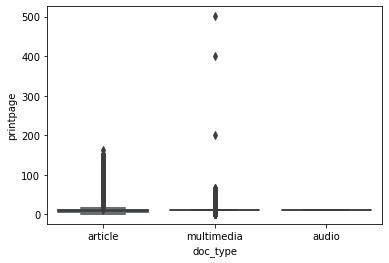

In [40]:
import seaborn as sns #Identifying outliers using a boxplot
sns.boxplot(x=dataframe['doc_type'],y=dataframe['printpage'])
plt.show()

Identifying outliers in the above three document types.

In [41]:
#Removing outliers in printpage column using standard deviation. Basically 3 standard deviations from the mean.
def remove_outliers(df,columns,n_std): #Since 
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [42]:
columns =['printpage']
dataframe = remove_outliers(dataframe,columns,3)
dataframe.shape

Working on column: printpage


(44323, 10)

Calculating the number of articles based on months.

In [87]:
dataframe['date'] = pd.to_datetime(dataframe['date'])


In [44]:
numberOfArticles= dataframe.groupby(dataframe.date.dt.month)['articleID'].count()
numberOfArticles
#Here 1 represents 11/2021, 2 represents 12/2021, 3 represents 01/2022 and so on.

date
1     3795
2     4021
3     4270
4     3884
5     4147
6     4364
7     3831
8     3958
9     4006
10    3828
11     321
12    3898
Name: articleID, dtype: int64

<AxesSubplot:title={'center':'Number of articles based on Months'}, xlabel='date'>

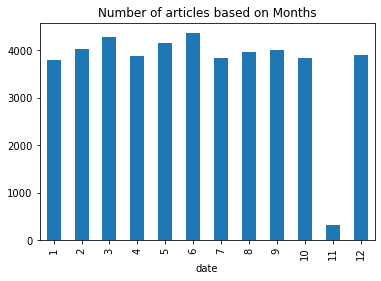

In [45]:
numberOfArticles.plot.bar(x="date", y="['date'][0]", title="Number of articles based on Months")
# Bar plot representing number of articles based on months.

From the above bar graph, we can infer that JUN month has the highest number of articles.
JAN is the next on the list.
MAR is the third.
AUG is the least.

In [46]:
docTypes = dataframe['doc_type'].value_counts()
docTypes

import matplotlib.pyplot as plt

def plotPie(doctypes):
    Tasks = [doctypes[0],doctypes[1],doctypes[2]]
    print(Tasks)

    my_labels = 'Articles','Multimedia','Audio'
    plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
    plt.title('Different types of Docs')
    plt.axis('equal')
    plt.show()

[40803, 3516, 4]


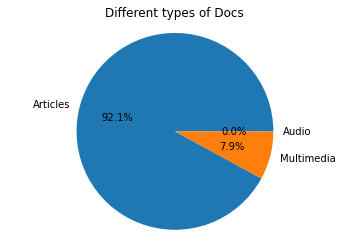

In [47]:
plotPie(docTypes)

There are 3 types of docs namely, Articles, Multimedia and Audio. Articles being the highest with 92% and Audio at 0%. Articles form the major part of the news.

In [48]:
materialTypes = dataframe['material_type'].value_counts()
materialTypes = pd.DataFrame(materialTypes)
print(materialTypes)

                     material_type
News                         31977
Op-Ed                         2901
Review                        2227
Interactive Feature           1514
briefing                      1417
Obituary (Obit)               1049
unknown                        937
Video                          655
Letter                         560
Slideshow                      414
Quote                          264
Correction                     197
Editorial                       88
List                            66
News Analysis                   55
An Appraisal                     1
Editors' Note                    1


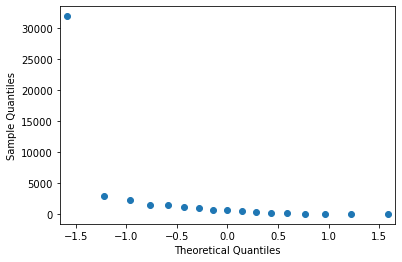

In [49]:
import statsmodels.api as sm
import pylab
sm.qqplot(materialTypes)
pylab.show()

Q-Q plot is used to summarize any distribution visually. We plot the theoretical Quantile values with the sample Quantile values. The dataset we're comparing has roughly a straight line, meaning the data is not normally distributed.

<AxesSubplot:>

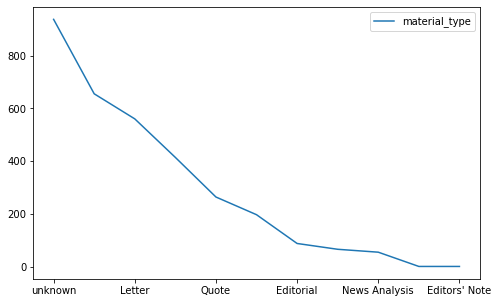

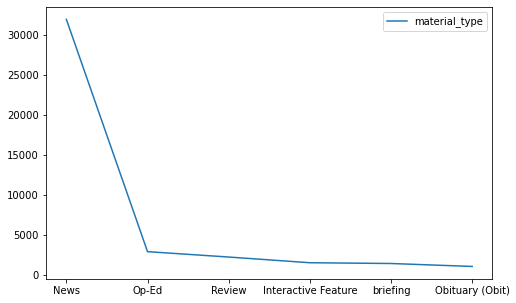

In [50]:
import seaborn as sns

materialTypeLessThan1000 = materialTypes[materialTypes.material_type < 1000]
#print(materialTypeLessThan1000)
materialTypeLessThan1000.plot(figsize=(8,5))

materialTypeGreaterThan1000 = materialTypes[materialTypes.material_type > 1000]
#print(materialTypeGreaterThan1000)
materialTypeGreaterThan1000.plot(figsize=(8,5))

1st Plot: It shows that the unknown category has the highest number of articles, the graph gradually decreases with editors note being the lowest among the 'lesser than 1000' category.
2nd Plot: News being the highest with articles being more than 30,000; and Obituary being the lowest.
There is a huge dip in the line graph at Op-Ed.

In [51]:
def convert(s):
    str1 = ""
    return(str1.join(s))

In [52]:
keywordsList = dataframe['keywords'].to_list() #Creating a list of keywords.
lst=[]
for i in (keywordsList):
    for j in i:
        if (j.isalpha() == True) or j==',': #Appending keywords to the list.
            lst.append(j)
keywordList = (convert(lst))



We're basically retrieving all the keywords and generating a wordcloud. We're considering a maximum of 100 words to be displayed in the wordcloud. The bigger and bolder a text appears, the more often its mentioned and the more imoportant it is.



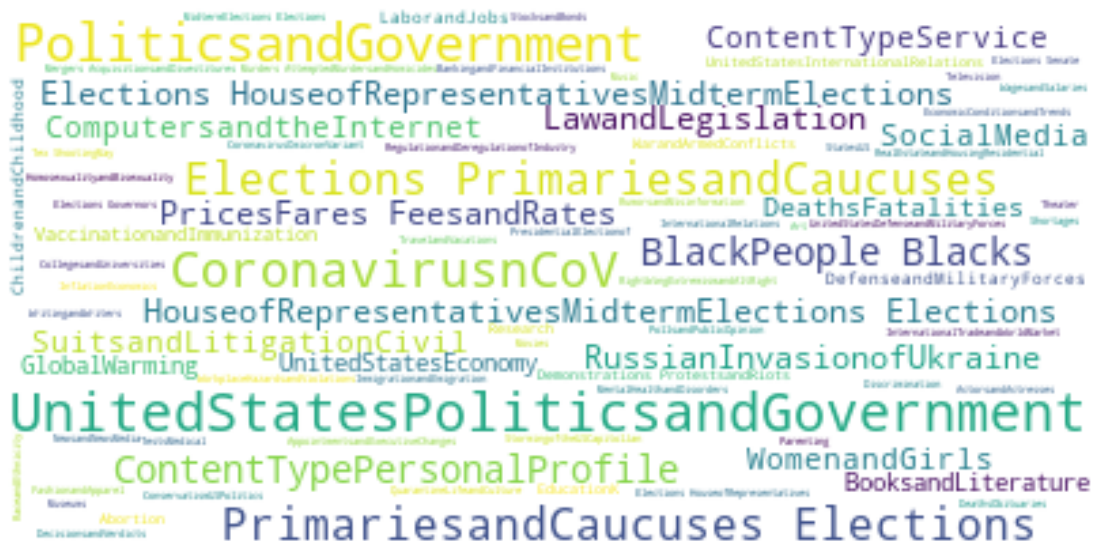

In [54]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(keywordList)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Top keywords that can be inferred from the wordcloud.
1. United States Politics and Government
2. Corona Virus
3. Russian Invasion of Ukraine
4. Black People
5. Politics and Government

<Figure size 1600x800 with 0 Axes>

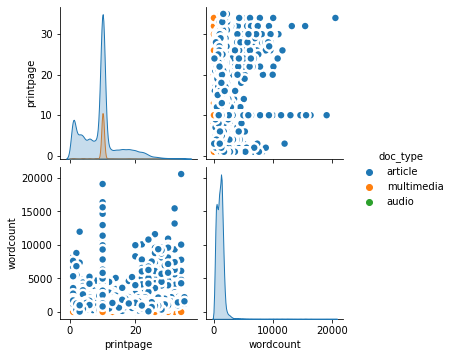

In [55]:
import seaborn as sns

plt.figure(figsize=(20,10), dpi= 80)
sns.pairplot(dataframe, kind="scatter", hue="doc_type", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

A pair plot gives two plots: Histogram and Scatterplot
Scatterplot gives the relationship between printpage and wordcount, whereas histogram shows the distribution.
We see that wordcount and printpage are highly correlated.

In [56]:
dataframe['sectionname'].value_counts().head()

U.S.            7438
World           5959
Business Day    3456
Opinion         3426
Arts            3134
Name: sectionname, dtype: int64

Analyzing top 5 sections

In [57]:
sectionUSA = dataframe[dataframe['sectionname'] == 'U.S.']
sectionUSA

,headline,date,articleID,doc_type,material_type,sectionname,keywords,printpage,wordcount,newsdesk
2,California Wildfire Burns More Than 900 Acres ...,2022-07-01,nyt://article/00641f5a-002c-5372-8677-6d89c76a...,article,News,U.S.,"['Wildfires', 'Fires and Firefighters', 'Evacu...",10.0161,525,Express
3,Columbia Won’t Participate in the Next U.S. Ne...,2022-07-01,nyt://article/cbbd1925-bb40-58df-8bf9-2da660d9...,article,News,U.S.,"['Colleges and Universities', 'Falsification o...",20.0000,780,National
17,Russia Hints at Linking Griner’s Case to Fate ...,2022-07-01,nyt://article/23bcc96b-00c7-536e-a76e-4aba53e0...,article,News,U.S.,"['Political Prisoners', 'Prisons and Prisoners...",8.0000,1431,Washington
53,Who Will Help Care for Texas’ Post-Roe Babies?,2022-07-01,nyt://article/df88d274-1a35-5b1a-a83c-245dd1a3...,article,News,U.S.,"['Law and Legislation', 'Abortion', 'Pregnancy...",18.0000,1709,Washington
67,A Beloved Black-Run Bookstore in Los Angeles I...,2022-07-01,nyt://article/f27f1ee3-95d9-50c3-acc5-262c1c14...,article,briefing,U.S.,[],10.0161,1357,National
...,...,...,...,...,...,...,...,...,...,...
44651,Watch Live: Biden Addresses Federal Response t...,2022-09-30,nyt://video/a6decf3d-56ba-5929-95c6-3fd7254737c6,multimedia,Video,U.S.,"['Hurricane Ian (2022)', 'Hurricanes and Tropi...",10.0161,0,unknown
44654,"In a Stately Ceremony, Supreme Court Welcomes ...",2022-09-30,nyt://article/41ca1642-1371-5397-b618-527651a2...,article,News,U.S.,['United States Politics and Government'],10.0161,711,Washington
44661,At least 21 deaths in Florida may be tied to I...,2022-09-30,nyt://article/b34c1074-22b0-5bda-8fff-283e51c7...,article,News,U.S.,"['Hurricane Ian (2022)', 'Deaths (Fatalities)']",10.0161,249,National
44663,What to Know About the 2022 Nobel Prizes,2022-09-30,nyt://article/7e362ce9-085e-590c-9e29-d6d1fb46...,article,News,U.S.,"['Books and Literature', 'Nobel Prizes', 'Econ...",10.0161,373,Express


We're taking the section US into consideration. First we obtain all the headlines and then try to figure out the sentiment.
We're using Textblob to perform NLP task.

In [58]:
text = ""
for i in dataframe['headline']:
    text+=i+" "
#print(text) #Converting all the headlines into text.

Performing sentiment analysis on US headlines.

In [59]:
from textblob import TextBlob
blob_text = TextBlob(text)
tags = blob_text.tags
#print(tags) #Tags are used to get the part of speech. Basically, the goal of a POS tagger is to assign linguistic (mostly grammatical) information to sub-sentential units. 

In [60]:
sentiment = blob_text.sentiment 
print(sentiment)
polarity = sentiment.polarity
print(polarity)
subjectivity = sentiment.subjectivity
print(subjectivity)

Sentiment(polarity=0.08440399092123332, subjectivity=0.4151538530614341)
0.08440399092123332
0.4151538530614341


Polarity lies between -1 and 1. Subjectivity lies between 0 and 1. 
Polarity value is a positive number, it implies positive sentiment.
Subjectivity quantifies the amount of personal opinion and factual information contained in the text.
Higher the value: Text contains personal opinion
Lower the value: Text contains factual information.
Here, the text factual.

In [61]:
SentimentDataframe = pd.DataFrame()
SentimentDataframe['polarity'] = [polarity]
SentimentDataframe['subjectivity'] = [subjectivity]
SentimentDataframe

,polarity,subjectivity
0,0.084404,0.415154


Text(0, 0.5, 'Range')

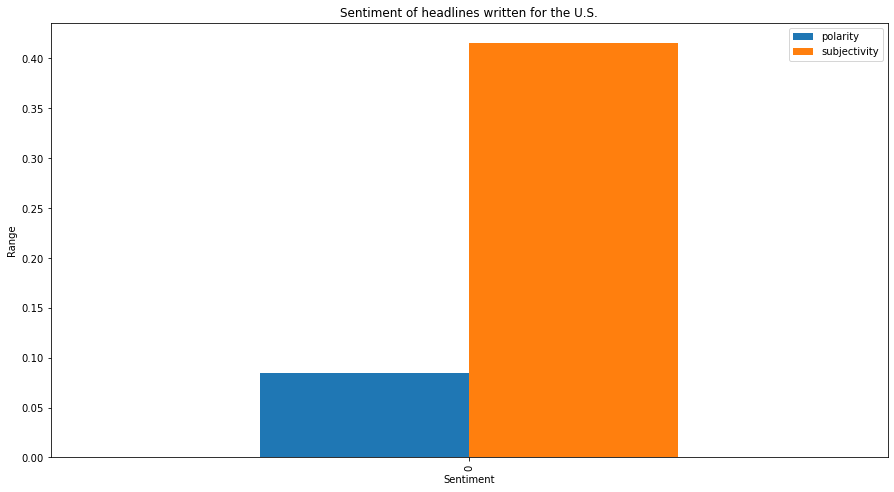

In [62]:
SentimentDataframe.plot(kind="bar",figsize=(15, 8))
plt.title("Sentiment of headlines written for the U.S.")
plt.xlabel("Sentiment")
plt.ylabel("Range")


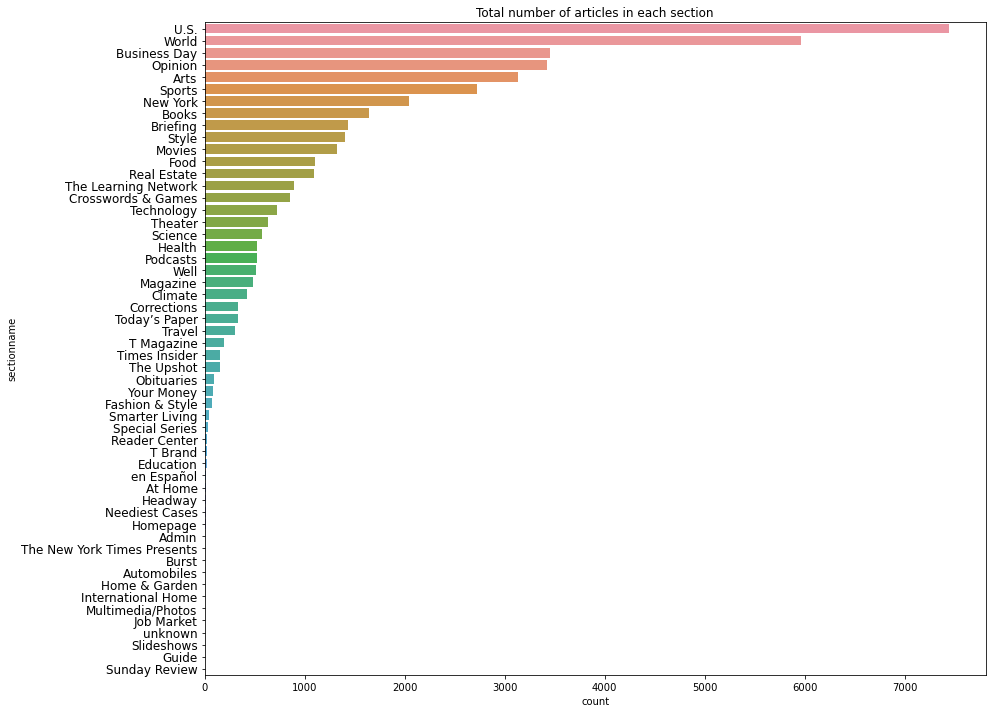

In [63]:
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 'medium'
mpl.rcParams['ytick.labelsize'] = 'large'
mpl.rcParams['figure.figsize'] = (14, 12)
sns.countplot(y="sectionname", data=dataframe, order=dataframe.sectionname.value_counts().index);
plt.title("Total number of articles in each section");

Number of articles in each section.
Top 5 highest sections
1. U.S.
2. World
3. Business Day
4. Opinion
5. Arts

Top 5 lowest sections
1. Guide
2. Slideshows
3. Job Market
4. Sunday Review
5. Unknown

In [64]:
sectionWorld = dataframe[dataframe['sectionname'] == 'World']
sectionWorld

,headline,date,articleID,doc_type,material_type,sectionname,keywords,printpage,wordcount,newsdesk
5,‘Wearing a Piece of History’: Vintage Clothing...,2022-07-01,nyt://article/58d1d632-4104-5331-9170-37ff4f21...,article,News,World,"['Fashion and Apparel', 'Sustainable Living', ...",10.0161,1230,Foreign
9,Missile Strikes on Ukraine Kill at Least 21 Ne...,2022-07-01,nyt://article/67748757-3594-50b6-b519-7a508088...,article,News,World,"['Civilian Casualties', 'Russian Invasion of U...",10.0161,451,Express
18,‘Long Live the Theater’: Mariupol’s Drama Comp...,2022-07-01,nyt://article/4ccb6660-e4b6-5952-aa8c-a3e3e03c...,article,News,World,"['Theater', 'Russian Invasion of Ukraine (2022)']",6.0000,1260,Foreign
24,North Korea Suggests ‘Alien Things’ From the S...,2022-07-01,nyt://article/b9b161a8-ccdd-5e50-a70c-47f5d4cf...,article,News,World,"['Coronavirus (2019-nCoV)', 'Propaganda', 'Vac...",10.0000,703,Foreign
25,Climate Protesters in Australia Face Harsh New...,2022-07-01,nyt://article/9ef62498-49f6-5e75-88be-a29fe026...,article,News,World,"['Global Warming', 'Demonstrations, Protests a...",9.0000,979,Foreign
...,...,...,...,...,...,...,...,...,...,...
44618,Lula vs. Bolsonaro: What to Know About Brazil’...,2022-09-30,nyt://article/52d23a32-7999-57e3-a00b-2d63151e...,article,News,World,['Elections'],10.0161,1091,Foreign
44637,"Ukraine submits an application to join NATO, w...",2022-09-30,nyt://article/d73e065c-f882-5e19-a8c1-e1985c04...,article,News,World,[],10.0161,541,Foreign
44652,Protests Erupt in Cuba Over Government Respons...,2022-09-30,nyt://article/443abf01-73a1-5be8-bb16-3cd8d5a3...,article,News,World,"['Demonstrations, Protests and Riots', 'Politi...",10.0161,661,Foreign
44655,Iran Protests Continue Despite Heavy Crackdowns,2022-09-30,nyt://article/ddb0b93c-6d8a-57b5-9e2c-e9b878be...,article,News,World,"['Demonstrations, Protests and Riots', 'Muslim...",10.0161,1101,Foreign


Number of world related articles published on a monthly basis.

<AxesSubplot:xlabel='date'>

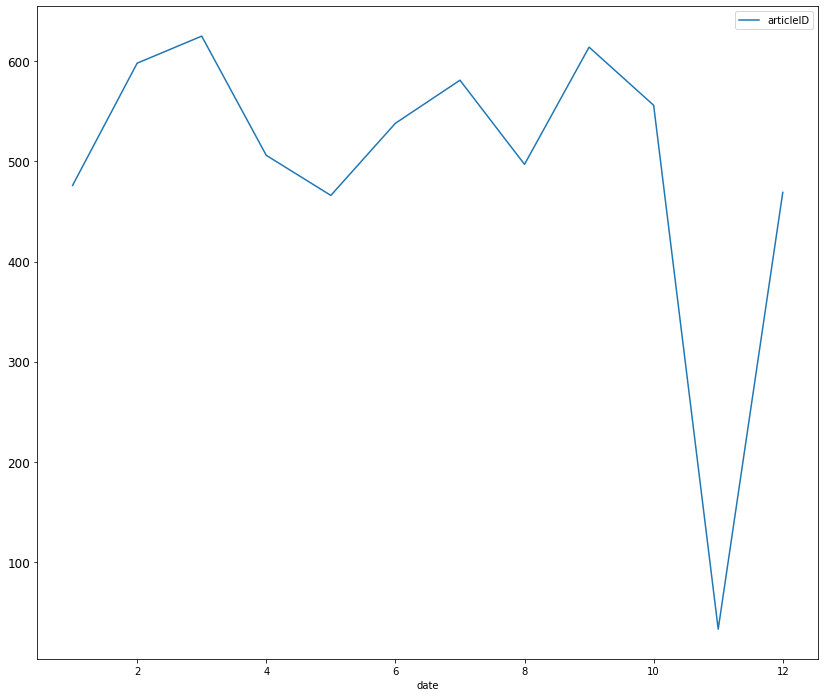

In [66]:
numberOfWorldArticles= dataframe.groupby(sectionWorld.date.dt.month)['articleID'].count()
numberOfWorldArticles = numberOfWorldArticles.to_frame()
numberOfWorldArticles.plot()

Highest number of articles were published in the month of January.
Least number of articles were published in the month of August.
We can see that the number of articles were not consistent instead there were ups and downs.

In [67]:
sectionBusinessDay = dataframe[dataframe['sectionname'] == 'Business Day']
sectionBusinessDay

,headline,date,articleID,doc_type,material_type,sectionname,keywords,printpage,wordcount,newsdesk
6,Former Apple Lawyer Pleads Guilty to Insider T...,2022-07-01,nyt://article/dc0929ee-e3b8-5751-92d2-8d7265c8...,article,News,Business Day,"['Insider Trading', 'Securities and Commoditie...",10.0161,433,Business
43,‘So Stressed Out’: Gas Prices Force Many to Re...,2022-07-01,nyt://article/a5ceae2d-47ba-56c9-a212-8fa9686f...,article,News,Business Day,"['Prices (Fares, Fees and Rates)', 'Oil (Petro...",1.0000,1168,Business
50,Is Baltimore Big Enough for the Two of Them?,2022-07-01,nyt://article/56b00e6e-130b-58df-a903-1b456a49...,article,News,Business Day,"['News and News Media', 'Nonprofit Organizatio...",1.0000,1367,Business
51,Workers at Airports Have Had It,2022-07-01,nyt://article/802dd458-9d17-505a-a04f-67a6c397...,article,News,Business Day,"['Labor and Jobs', 'Airports', 'Wages and Sala...",5.0000,1344,Business
52,When Private Jets Ferry Billionaires to Small-...,2022-07-01,nyt://article/f8fb91a3-80dd-5268-9eda-68bef0d1...,article,News,Business Day,"['Private Aircraft', 'Airports', 'High Net Wor...",1.0000,1305,Business
...,...,...,...,...,...,...,...,...,...,...
44619,The Markets Face a Rare Double Decline,2022-09-30,nyt://article/bde7cb54-3b9a-57fc-abe1-e365292f...,article,News,Business Day,"['Layoffs and Job Reductions', 'Stocks and Bon...",10.0161,1832,Business
44621,The Fed’s Preferred Inflation Measure Remains ...,2022-09-30,nyt://article/e30ee76b-fc43-55f3-95e2-f5db6a99...,article,News,Business Day,"['United States Economy', 'Consumer Behavior',...",10.0161,889,Business
44622,Consumers kept spending in August amid rising ...,2022-09-30,nyt://article/bb94d08e-2662-5947-92a8-ec55bf47...,article,News,Business Day,"['Consumer Behavior', 'United States Economy',...",10.0161,303,Business
44636,Wall Street ends an ugly quarter with another ...,2022-09-30,nyt://article/ac7fa557-3db5-562b-9a2d-78e59518...,article,News,Business Day,"[""Standard & Poor's 500-Stock Index"", 'Stocks ...",10.0161,553,Business


In [70]:
sectionBusinessDayArticle = sectionBusinessDay[sectionBusinessDay['doc_type'].str.contains('article')] 
sectionBusinessDayArticleCount = sectionBusinessDayArticle['articleID'].count()
#Filtering out based on doc_type.
sectionBusinessDayMultimedia = sectionBusinessDay[sectionBusinessDay['doc_type'].str.contains('multimedia')] 
sectionBusinessDayMultimediaCount = sectionBusinessDayMultimedia['articleID'].count()

sectionBusinessDayAudio = sectionBusinessDay[sectionBusinessDay['doc_type'].str.contains('audio')] 
sectionBusinessDayAudioCount = sectionBusinessDayAudio['articleID'].count()

sectionAnalysisBusinessDay = pd.DataFrame()
sectionAnalysisBusinessDay['article'] = [sectionBusinessDayArticleCount]
sectionAnalysisBusinessDay['multimedia'] = [sectionBusinessDayMultimediaCount]
sectionAnalysisBusinessDay['audio'] = [sectionBusinessDayAudioCount]

sectionAnalysisBusinessDay

,article,multimedia,audio
0,3401,55,0


[3401, 55, 0]


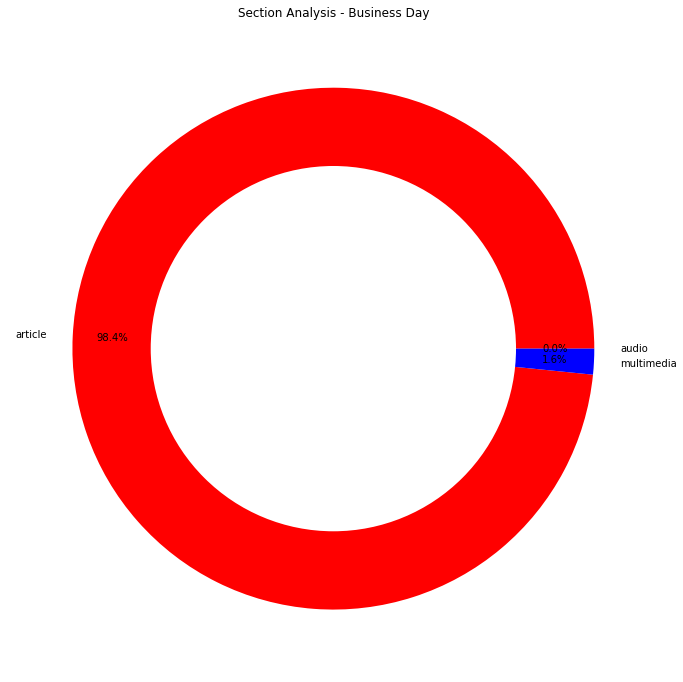

In [71]:
sectionAnalysisBusinessDayArray = sectionAnalysisBusinessDay.to_numpy()
arraySection = []
arraySection.append(sectionAnalysisBusinessDayArray[0][0])
arraySection.append(sectionAnalysisBusinessDayArray[0][1])
arraySection.append(sectionAnalysisBusinessDayArray[0][2])
print(arraySection)
slabels = ["article","multimedia","audio"]
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500']

  
# Pie Chart
plt.pie(arraySection, colors=colors, labels=slabels,
        autopct='%1.1f%%', pctdistance=0.85)  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('Section Analysis - Business Day')
plt.show()

Based on the above pie chart, 98.4% of the articles are related to Business
1.6% of multimedia are relating to Business
0% audio

In [72]:
sectionOpinion = dataframe[dataframe['sectionname'] == 'Opinion']
sectionOpinion

,headline,date,articleID,doc_type,material_type,sectionname,keywords,printpage,wordcount,newsdesk
32,The Single Best Guide I’ve Heard to the Suprem...,2022-07-01,nyt://article/e4eaba7d-694d-513f-ab7e-fc2692d8...,article,Op-Ed,Opinion,"['audio-neutral-informative', 'Law and Legisla...",10.0161,461,OpEd
33,The Supreme Court’s E.P.A. Decision Is More Gl...,2022-07-01,nyt://article/d6fc894f-f158-5d3a-bae1-6d6ac8e7...,article,Op-Ed,Opinion,"['internal-sub-only-nl', 'Global Warming', 'Gr...",23.0000,1361,OpEd
36,America’s Post-Roe Chaos Is Here,2022-07-01,nyt://article/d9baa998-3358-54e1-9c4e-7133adbf...,article,Op-Ed,Opinion,"['Abortion', 'United States Politics and Gover...",22.0000,881,OpEd
37,What Makes a Fetus a Person?,2022-07-01,nyt://article/fd4e2117-cedf-5abf-a04b-b6b036c2...,article,Op-Ed,Opinion,"[""Women's Rights"", 'Abortion', ""Dobbs v Jackso...",23.0000,1274,OpEd
38,A Supreme Court Head-Scratcher: Is a Colonial ...,2022-07-01,nyt://article/e7a02816-164a-5b14-92d7-675306f5...,article,Op-Ed,Opinion,"['Gun Control', 'Firearms', 'Second Amendment ...",22.0000,1116,OpEd
...,...,...,...,...,...,...,...,...,...,...
44581,Why China’s Crimes in Xinjiang Cannot Go Unpun...,2022-09-30,nyt://article/6aee523c-79c7-5e81-80c2-63636a62...,article,Op-Ed,Opinion,"['Human Rights and Human Rights Violations', '...",10.0161,1099,OpEd
44585,"Bolsonaro Might Be Beaten, and It Feels Too Go...",2022-09-30,nyt://article/a42d891f-ed3d-5994-8d10-15a13543...,article,Op-Ed,Opinion,"['Elections', ""Coups D'Etat and Attempted Coup...",10.0161,884,OpEd
44591,The Supreme Court Is Broken. Where’s Biden?,2022-09-30,nyt://article/c1733a3a-92f4-553b-be29-faafb470...,article,Op-Ed,Opinion,"['United States Politics and Government', 'Cou...",10.0161,2512,OpEd
44665,Helping Florida Recover From Hurricane Ian,2022-09-30,nyt://article/db872e55-c627-56de-b0db-cb5e127a...,article,Letter,Opinion,"['Hurricanes and Tropical Storms', 'Hurricane ...",10.0161,1046,Letters


<AxesSubplot:xlabel='sectionname', ylabel='material_type'>

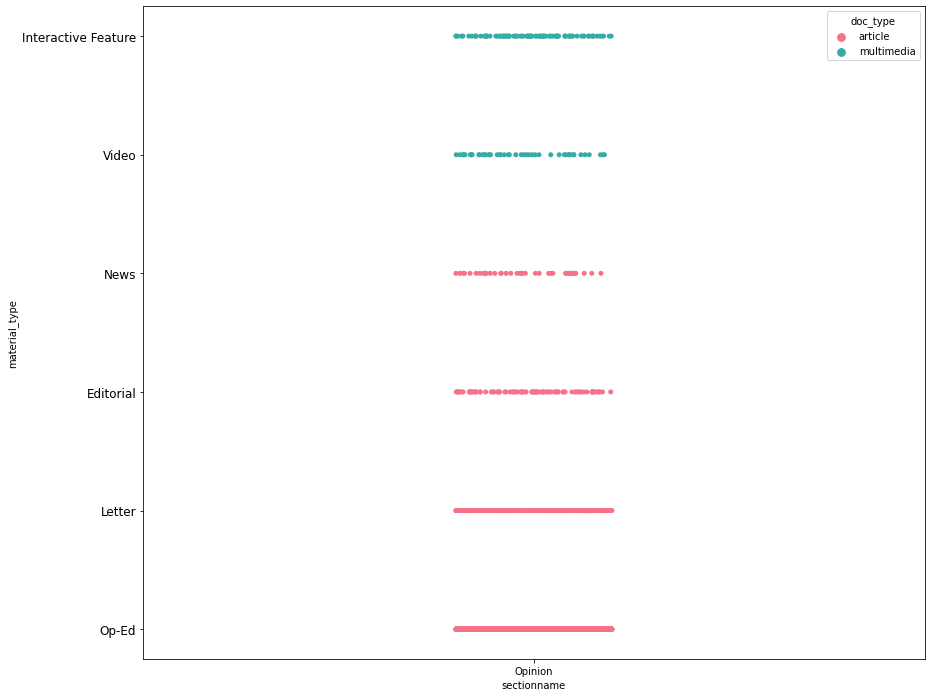

In [73]:
sns.stripplot(x="sectionname", y="material_type", hue="doc_type", data=sectionOpinion, palette="husl")

A strip plot is used to reveal gaps and outliers. From the above graph we can infer that there are no gaps and data is least outliers. 

In [74]:
sectionArts = dataframe[dataframe['sectionname'] == 'Arts']
sectionArts

,headline,date,articleID,doc_type,material_type,sectionname,keywords,printpage,wordcount,newsdesk
23,Stephen Colbert Reflects on This Year in the S...,2022-07-01,nyt://article/4c18e184-9359-5e0c-95e0-8b7ee0d1...,article,News,Arts,['Television'],10.0161,581,Culture
31,5 Things to Do This Weekend,2022-07-01,nyt://interactive/8c9cbcc5-a768-5a21-8a8b-3cb4...,multimedia,Interactive Feature,Arts,"['Movies', 'Art', 'Theater', 'Museums', ""Jacob...",10.0161,0,Arts
69,"After ‘Rocketman’, Taron Egerton Transforms Ag...",2022-07-01,nyt://article/12b24525-bf7c-50a3-b88b-74f8c5ef...,article,News,Arts,"['Actors and Actresses', 'Content Type: Person...",8.0000,1560,Arts&Leisure
84,What’s in Our Queue? Beyoncé and More,2022-07-01,nyt://interactive/d98bc449-74b1-53b8-9bb7-e20f...,multimedia,Interactive Feature,Arts,['Culture (Arts)'],10.0161,0,Arts
92,"Cardi B’s All-Star Team-Up, and 9 More New Songs",2022-07-01,nyt://article/09d01783-277d-52c1-83a1-5df370cd...,article,News,Arts,"['Rhythm and Blues (Music)', 'Pop and Rock Mus...",4.0000,1244,Culture
...,...,...,...,...,...,...,...,...,...,...
44640,"‘The Lord of the Rings: The Rings of Power,’ S...",2022-09-30,nyt://article/68bcc8de-1364-5b68-898c-207c3378...,article,News,Arts,['Television'],10.0161,1371,Culture
44641,"Paramore Steps Into a New Era, and 8 More New ...",2022-09-30,nyt://article/04cf1af2-c1ee-5247-a887-e131bf3e...,article,News,Arts,"['Pop and Rock Music', 'Rhythm and Blues (Musi...",10.0161,986,Culture
44647,"Sue Mingus, Promoter of Her Husband’s Musical ...",2022-09-30,nyt://article/179d85d0-bf0d-58e4-ae9f-cd529eff...,article,Obituary (Obit),Arts,"['Jazz', 'Music', 'Deaths (Obituaries)']",10.0161,1078,Obits
44668,Review: A Portrait Reveals a Composer With a D...,2022-09-30,nyt://article/dd8f5b7e-1256-582e-8dbf-958d75bf...,article,Review,Arts,['Classical Music'],10.0161,468,Culture


/var/folders/nj/b6dw2bwx4l990d0x8h9pc2sh0000gn/T/ipykernel_2197/1333534507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sectionArts["Number of Keywords"] = sectionArts["keywords"].apply(lambda n: len(n.split()))


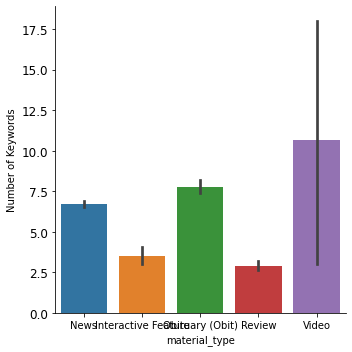

In [75]:
import seaborn as sns
sectionArts["Number of Keywords"] = sectionArts["keywords"].apply(lambda n: len(n.split()))
#print(sectionArts.head())
sns.catplot(data=sectionArts, x="material_type", y="Number of Keywords",kind="bar")

Here we're plotting categorical material_types against the count of keywords.
Video is found to have the maximum number of keywords, Review being the least.

<AxesSubplot:xlabel='Number of Keywords', ylabel='material_type'>

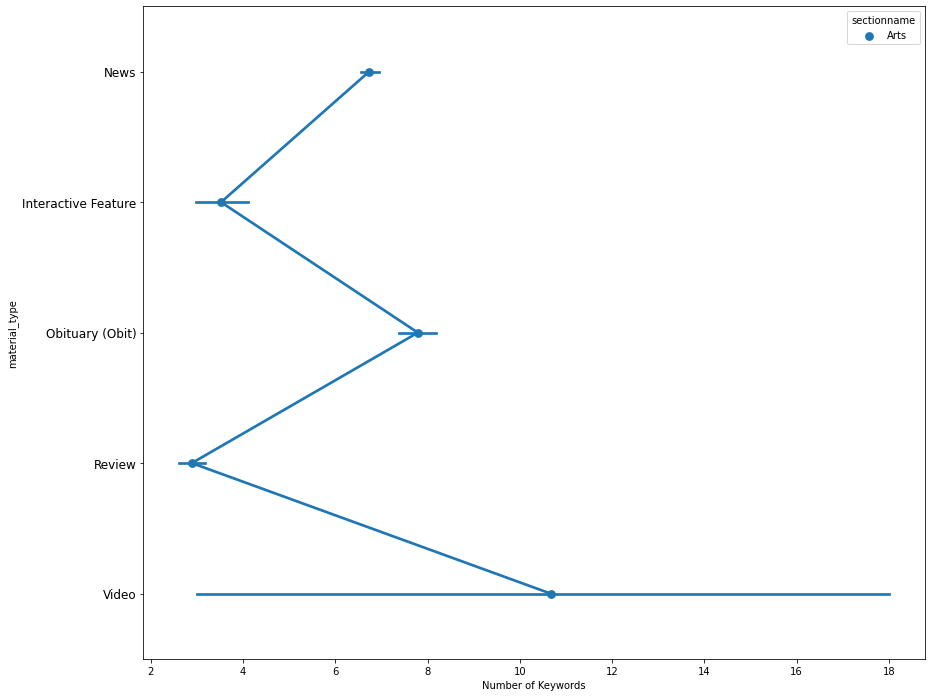

In [76]:
sns.pointplot(data=sectionArts, x="Number of Keywords", y="material_type", hue="sectionname")

The above plot shows the comparision between different categorical variables, it represnts an estimate of central tendency for a numeric variable. It is easy to find the change in a variable based on different categories. 

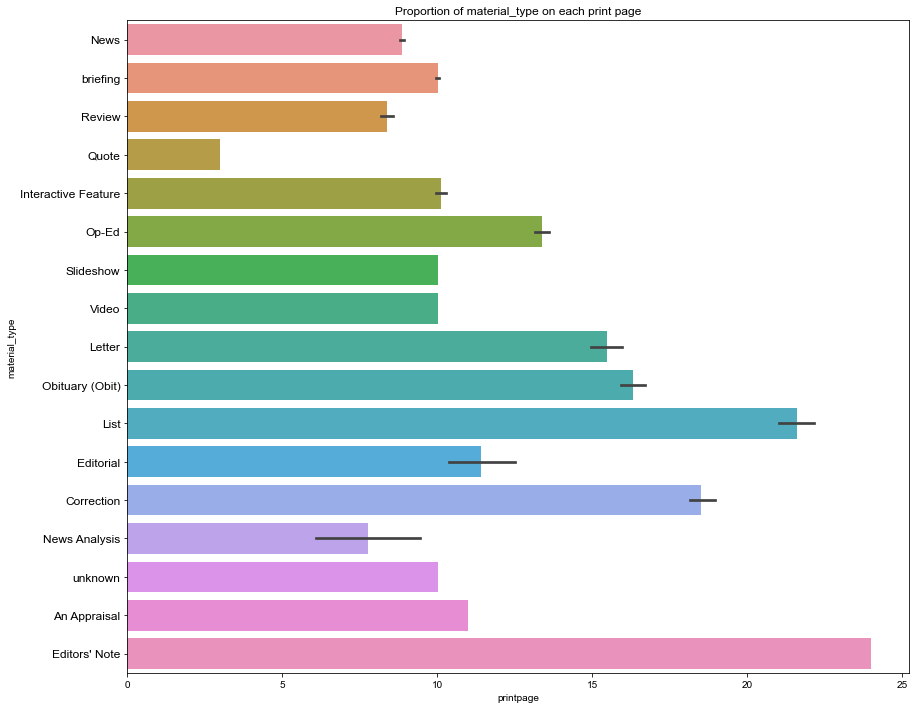

In [77]:
sns.barplot(x='printpage', y='material_type', data=dataframe);
sns.set(rc = {'figure.figsize':(15,8)})
plt.title("Proportion of material_type on each print page");


Editors note is printed on almost at the end of the articles.

In [78]:
dataframe.printpage.quantile(0.99), dataframe.printpage.quantile(0.95)

(27.0, 21.0)

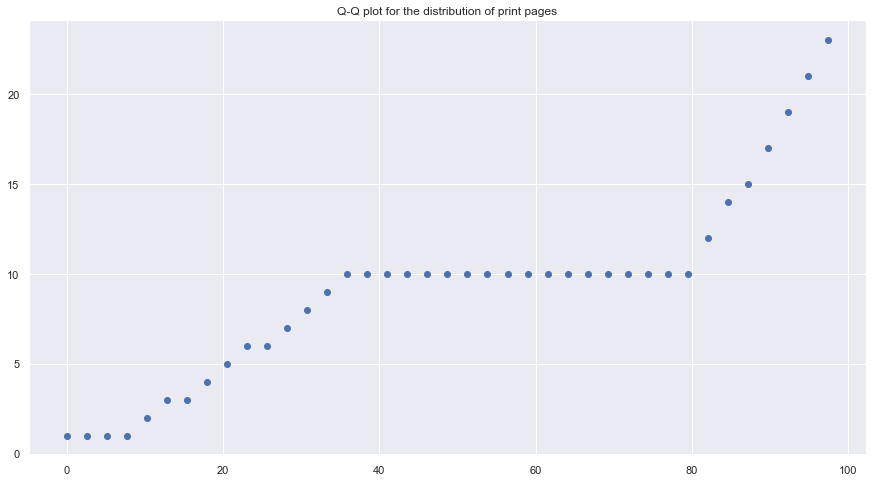

In [79]:
percs = np.linspace(0,100,40)
qn = np.percentile(dataframe.printpage, percs)
plt.scatter(percs[:-1], qn[:-1]);
plt.title('Q-Q plot for the distribution of print pages');

The above quantile plot is not linear, we can see that most of the documents are printed on 10th page and others are distributed across all the print pages.
There is a linear increase in the values from 0th percentile till 40th percentile.
Then its flat and then rises beyond 80th percentile.

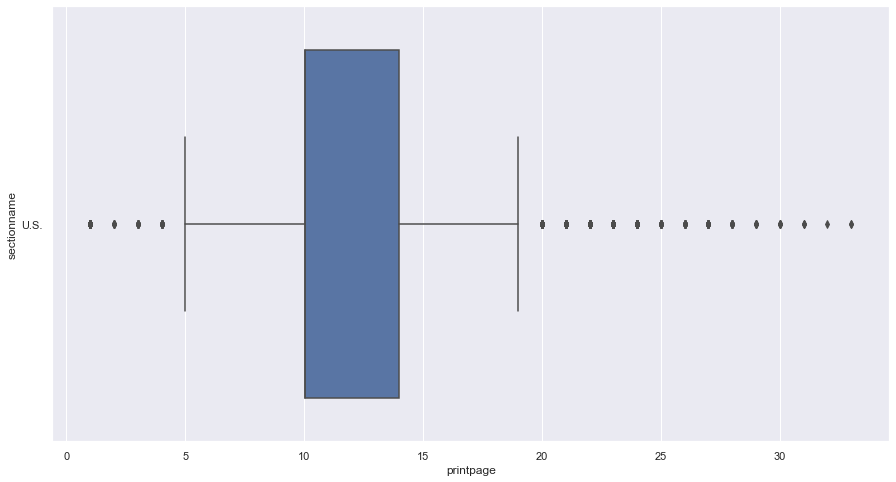

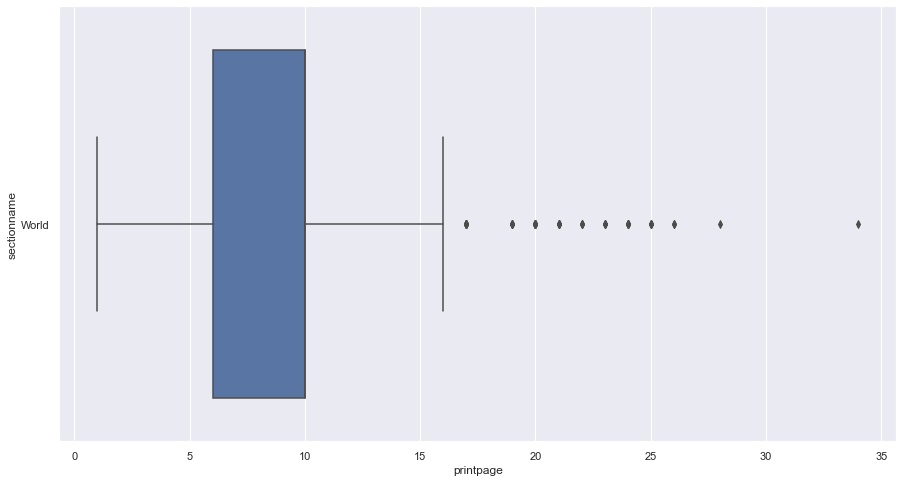

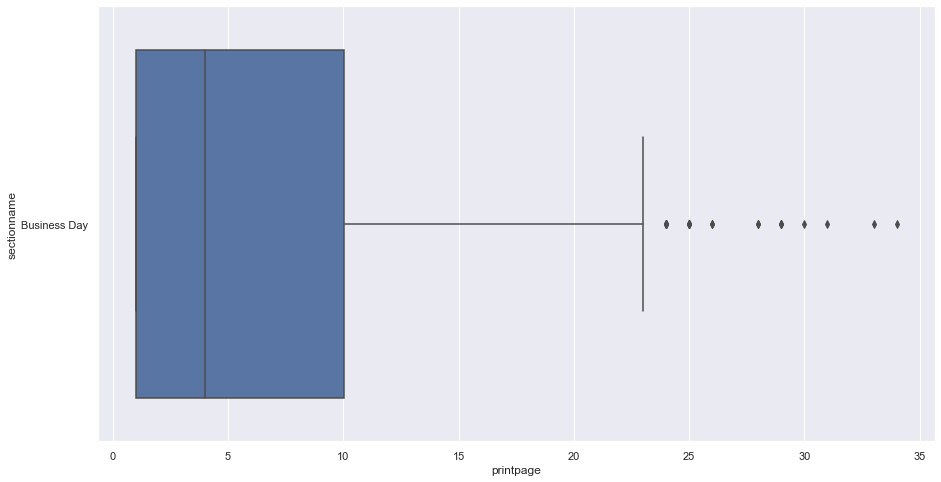

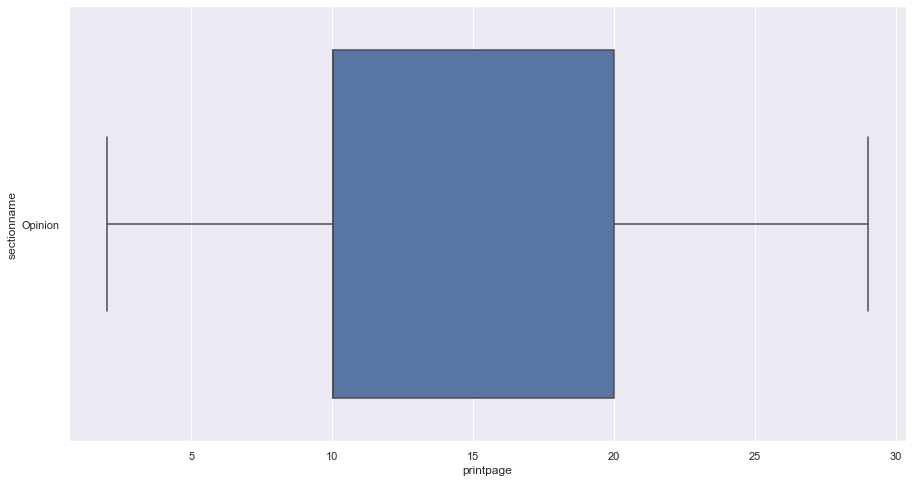

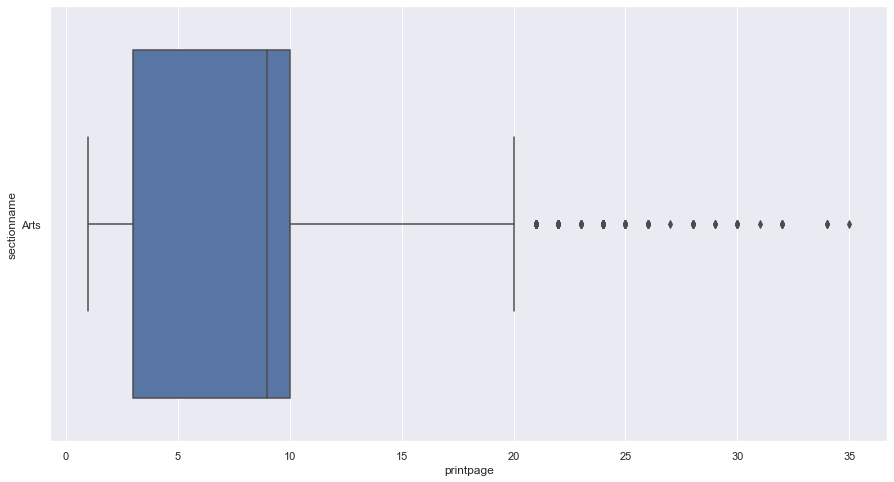

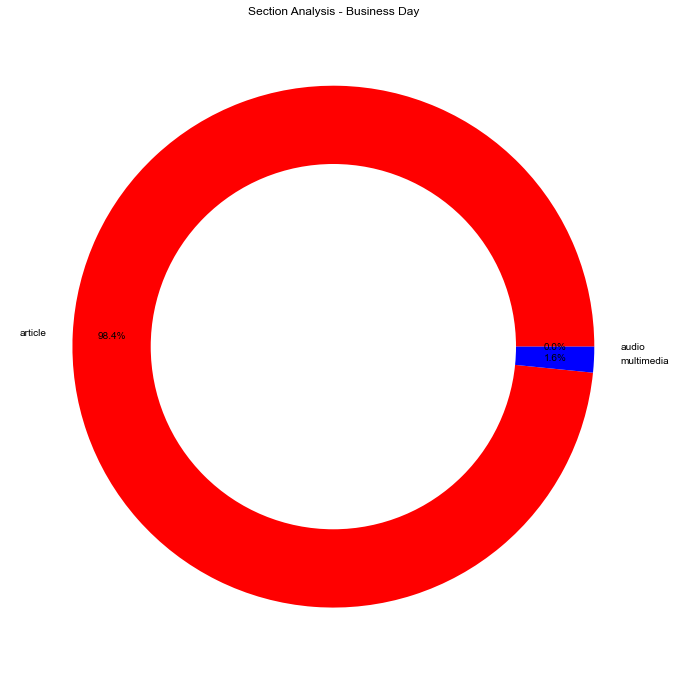

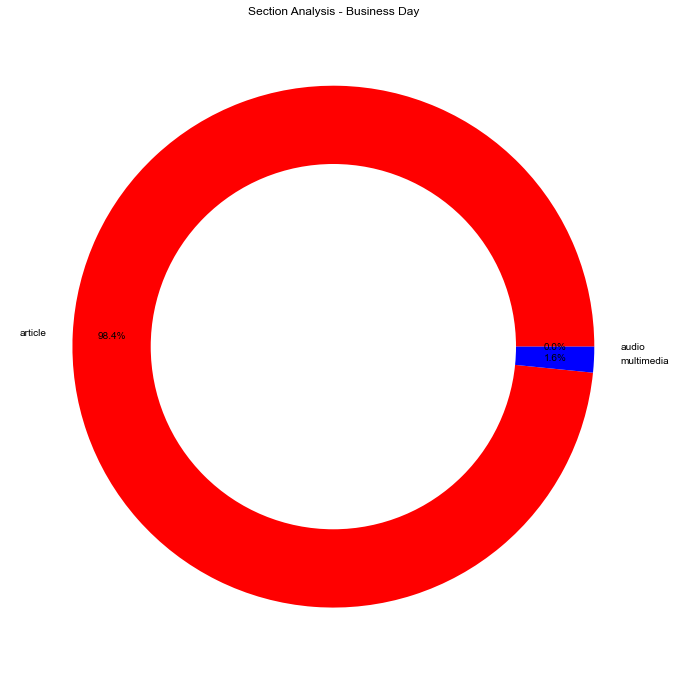

In [80]:

import seaborn as sns 
sns.boxplot(x=dataframe['printpage'],y=sectionUSA['sectionname'])
plt.show()
sns.boxplot(x=dataframe['printpage'],y=sectionWorld['sectionname'])
plt.show()

sns.boxplot(x=dataframe['printpage'],y=sectionBusinessDay['sectionname'])
plt.show()

sns.boxplot(x=dataframe['printpage'],y=sectionOpinion['sectionname'])
plt.show()

sns.boxplot(x=dataframe['printpage'],y=sectionArts['sectionname'])
plt.show()

plt.figure(fig)


The above box plots shows the outliers and distribution across the top 5 sections.

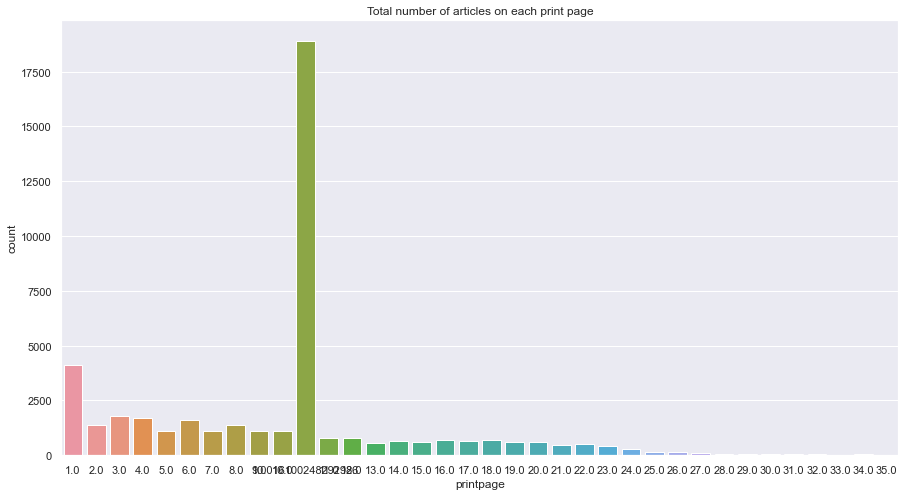

In [81]:
sns.countplot(x="printpage", data=dataframe[dataframe.printpage>0]);
plt.title("Total number of articles on each print page");

The above graph indicates that more number of articles were printed on the 10th page when compared to other pages.

/Users/aditya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


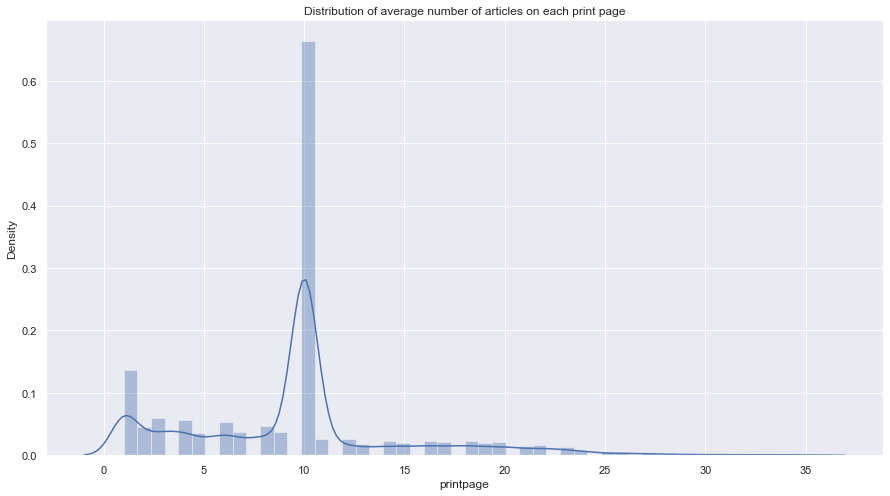

In [82]:
sns.distplot(dataframe.printpage);
plt.title("Distribution of average number of articles on each print page");
#Most of the articles are found to be printed on the tenth page.

In [83]:
top_desk = set(dataframe.newsdesk.value_counts()[:4].index)
top_desk #Obtaining the top 4 news desks.

{'Business', 'Culture', 'Foreign', 'OpEd'}

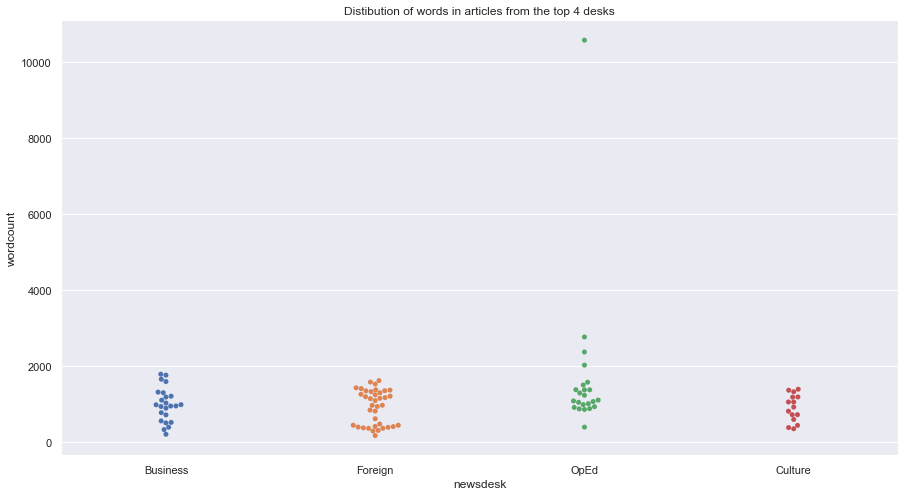

In [84]:
sample_frequent_newDesk = dataframe.loc[dataframe.newsdesk.isin(top_desk),
                                 ['newsdesk', 'wordcount']].sample(100)

sample_frequent_newDesk.newsdesk = sample_frequent_newDesk.newsdesk.astype('object')
sns.swarmplot(x='newsdesk', y='wordcount', data=sample_frequent_newDesk);
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'medium'
plt.title("Distibution of words in articles from the top 4 desks");

The above plot shows that values are evenly distributed, with very less outliers.

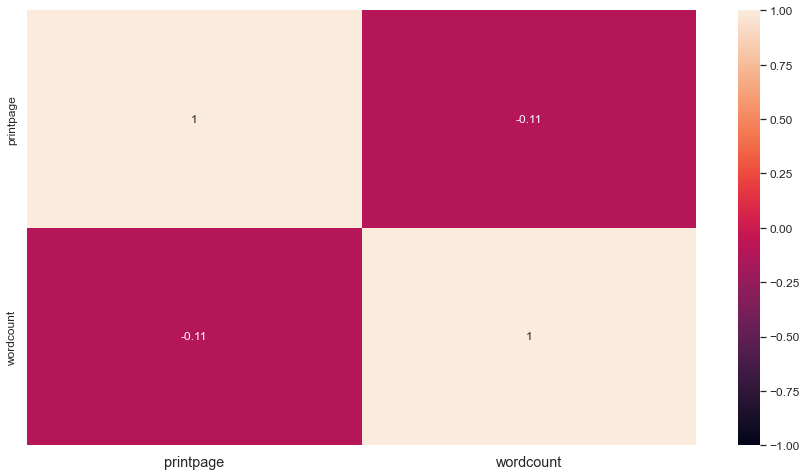

In [85]:
heatmaptop4 = pd.DataFrame()
heatmaptop4 = dataframe.query("sectionname=='U.S.' "or" sectionname=='World' "or" sectionname=='Business Day' "or" sectionname=='Arts'")
heatmaptop4

heatmap = sns.heatmap(heatmaptop4.corr(), vmin=-1, vmax=1, annot=True)


The value is +1 then we say the variables are positively correlated. And they vary in the same direction simultaneously.

The value is -0.14, then we can say that they're not correlated.

In [88]:
dataframenewsDesk = pd.DataFrame()
dataframenewsDesk['Business'] = dataframe[dataframe["newsdesk"] =='Business'].value_counts()

dataframenewsDesk1 = pd.DataFrame()
dataframenewsDesk1['Culture'] = dataframe[dataframe["newsdesk"] =='Culture'].value_counts()

dataframenewsDesk2 = pd.DataFrame()
dataframenewsDesk2['Foreign'] = dataframe[dataframe["newsdesk"] =='Foreign'].value_counts()

dataframenewsDesk3 = pd.DataFrame()
dataframenewsDesk3['OpEd'] = dataframe[dataframe["newsdesk"] =='OpEd'].value_counts()


correlation = pd.DataFrame()
correlation['Business'] = [dataframenewsDesk['Business'].sum()]
correlation['Culture'] = [dataframenewsDesk1['Culture'].sum()]
correlation['Foreign'] = [dataframenewsDesk2['Foreign'].sum()]
correlation['OpEd'] = [dataframenewsDesk3['OpEd'].sum()]
correlation

,Business,Culture,Foreign,OpEd
0,3693,3007,5132,2859


<AxesSubplot:>

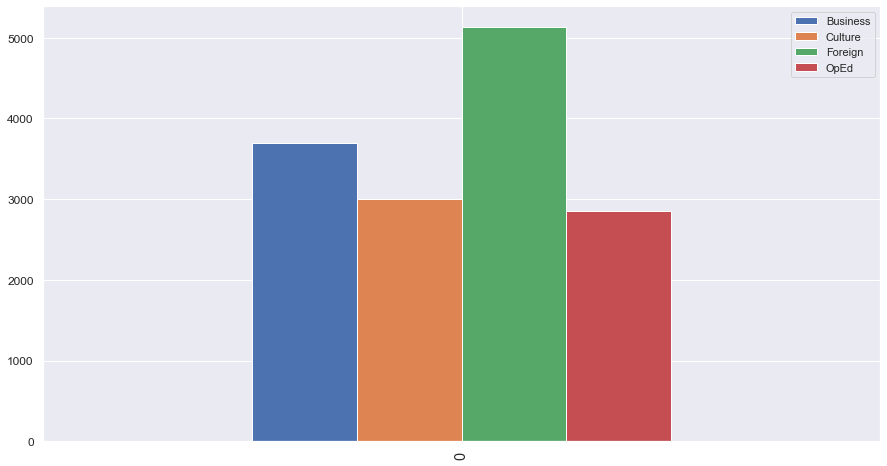

In [89]:
correlation.plot.bar()

The above plot shows the number of articles from top 4 news desks.

# Conclusion

In this task, we analyzed new york times archive data over the last one year.
From the observations we can see that, the news regarding the US is more comparatively. 
Articles are more when compared to multimedia and audio.
The news typically covers all the sections.
Foreign new desk publishes the most number of articles.

Challenges: The data obtained has less numerical values and more categorical values, so its quite difficult to gain information from them and also find correlations between them.

Further Analysis
    We basically have roughly around 44K rows, the analysis can be further improved an even more larger dataset.
    The null values were more in categorical columns, if there columns had values it would have been better rather
    than filling it with unknown.